In [1]:
from IPython.core.display import HTML

HTML(
    """
    <style>

    .usecase-title, .usecase-duration, .usecase-section-header {
      padding-left: 15px;
      padding-bottom: 10px;
      padding-top: 10px;
      padding-right: 15px;
      background-color: #0f9295;
      color: #fff;
      }

    .usecase-title {
      font-size: 1.7em;
      font-weight: bold;
      }

    .usecase-authors, .usecase-level, .usecase-skill {
      padding-left: 15px;
      padding-bottom: 7px;
      padding-top: 7px;
      background-color: #baeaeb;
      font-size: 1.4em;
      color: #121212;
      }

    .usecase-level-skill {
      display: flex;
      }

    .usecase-level, .usecase-skill {
      width: 50%;
      }

    .usecase-duration, .usecase-skill {
      text-align: right;
      padding-right: 15px;
      padding-bottom: 8px;
      font-size: 1.4em;
      }

    .usecase-section-header {
      font-weight: bold;
      font-size: 1.5em;
      }

    .usecase-subsection-header, .usecase-subsection-blurb {
      font-weight: bold;
      font-size: 1.2em;
      color: #121212;
      }

    .usecase-subsection-blurb {
      font-size: 1em;
      font-style: italic;
      }

    </style>
    """)

<div class="usecase-title">Customer Service Analysis</div>
<div class="usecase-authors"><b>Authored by: </b> Carissa, Wing Sum Wong</div>

<div class="usecase-duration"><b>Duration:</b> 90 mins</div>

<div class="usecase-level-skill">
    <div class="usecase-level"><b>Level: </b>Intermediate</div>
    <div class="usecase-skill"><b>Pre-requisite Skills: </b>Python</div>
</div>

<div class="usecase-section-header">Scenario</div>

As a member of the City council's service delivery team, I aim to gain a deeper understanding of the service requests that are received through our visitor service centers and various communication channels. The intent is to enhance the efficiency and responsiveness of our services. Specifically, I am looking to:

*   Analyze the trends and fluctuations in service requests to identify seasonal patterns or unexpected spikes, informing staffing and resource allocation
*   Determine which services are in highest demand and might need additional resources or process improvements
*   Gain insights into the specific issues that residents face to tailor our services to meet their needs more effectively
*   Recognize long-term patterns in service requests over time to evaluate the impact of our policies and interventions
*   Investigate the evolution of customers' preferred communication channels, such as live chat, email, or face-to-face interactions, which will guide us in optimizing these channels and potentially integrating new technologies for improved accessibility and satisfaction
*    Review the average resolution times across different categories and channels to identify bottlenecks and best practices, aiming to reduce wait times and increase the overall efficiency of our response to service requests

<div class="usecase-section-header">What this use case will teach you</div>

At the end of this use case, you will:

*   acquire skills in securely fetching datasets using APIs
*   develop proficiency in data preprocessing, cleansing, and integration, preparing for handling real-world data complexities
*   enhance my expertise in using visualization tools such as Plotly and Matplotlib, allowing me to create insightful and interactive data presentations
*   gain comprehensive experience in conducting a data analysis project from inception to conclusion, providing a 360-degree view of the analytical workflow
*   cultivate the ability to independently manage an analysis project, from dataset acquisition to the publication of results
*   understand the nuances of service request processing times and learn how to extract meaningful patterns from resolution data
*   discover the range and distribution of resolution times across various communication channels, offering insights into operational efficiencies
*   identify areas requiring operational improvements and formulate data-driven recommendations for service delivery optimization

<div class="usecase-section-header">Background</div>

In today's customer-centric landscape, the capacity to analyze and respond to service request patterns is pivotal for enhancing service delivery. Our analytical endeavour is anchored in dissecting datasets that capture the dynamic interactions between customers and service providers within an urban setting.

I have curated three expansive datasets, each spanning different time frames and offering distinct perspectives into the fabric of customer service interactions:

1.   [Melbourne Visitor Contact Stats (2014-2018)](https://data.melbourne.vic.gov.au/explore/dataset/melbourne-visitor-contact-stats/information/)

      This dataset records visitor engagement with city programs and contact points. While it reveals the popularity and extent of visitor services, the discontinuity of data beyond 2018 poses challenges for a longitudinal analysis.

2.   [Customer service requests, with resolution time (2014-2016)](https://data.melbourne.vic.gov.au/explore/dataset/customer-service-requests-with-resolution-time/information/)

      This dataset details the lifecycle of service requests from initiation to resolution. Its utility in evaluating operational efficiency is curtailed by a lack of records post-2016, limiting our insight into recent trends and response strategies.

3.   [Customer Service Requests (with digital channel information) (2018)](https://data.melbourne.vic.gov.au/explore/dataset/customer-service-requests-with-digital-channel-information/information/)

      Providing a detailed account of the digital communication channels used by customers, this dataset's confinement to a single year offers a mere snapshot, rather than a continuous narrative of customer service interactions.

Each dataset, while rich in detail, offers only a fragmentary view of the timeline, leading to a disjointed overall picture when combined. Furthermore, missing records and disparate data collection periods necessitate rigorous data cleaning and consolidation to create a coherent dataset that could enable holistic analysis.

Additionally, the evolving preferences for customer communication channels and the advent of new digital platforms are not consistently documented, impeding our ability to construct a complete picture of shifts in customer behavior. Such informational voids and inconsistencies pose significant challenges to the depth and reliability of any trend analysis or correlation study aimed at improving service delivery methods.

This task is not merely to analyze these datasets but also to construct a bridge across these informational gaps to inform strategic public service management planning. Our endeavours, while retrospective in appraising past service performance, are equally forward-looking, with the goal of equipping urban service frameworks to meet future customer engagement needs.

# **Import Modules and Fetch Data from Open Data Melbourne**

In [2]:
!pip install squarify -qqq

In [3]:
# from google.colab import drive
import requests
import os
from io import StringIO

import calendar
import pandas as pd
# import plotly.express as px
# import plotly.graph_objects as go
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import numpy as np
import squarify

In [4]:
# drive.mount('/content/gdrive')

# with open('/content/gdrive/My Drive/Colab Notebooks/apiKey.txt', 'r') as file:
#     api_key = file.read().strip()

# api_key = os.getenv(api_key)

## **Dataset:** Melbourne Visitor Contact Stats

In [5]:
# export endpoint

# https://data.melbourne.vic.gov.au/explore/dataset/melbourne-visitor-contact-stats/table/
dataset1_id = 'melbourne-visitor-contact-stats'

base_URL = 'https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/'
# apikey = api_key
dataset1_id = dataset1_id
format = 'csv'

url = f'{base_URL}{dataset1_id}/exports/{format}'
params = {
    'select': '*',
    'limit': -1,  # all records
    'lang': 'en',
    'timezone': 'UTC',
#     'api_key': apikey
}

# GET request
response = requests.get(url, params = params)

if response.status_code == 200:
    # StringIO to read the CSV data
    url_content = response.content.decode('utf-8')
    MelVisitor_stat = pd.read_csv(StringIO(url_content), delimiter = ';')
    print(MelVisitor_stat.sample(2, random_state = 999))    # test
else:
    print(f'Request failed with status code {response.status_code}')

           date  number_of_contacts                   source  year     month
258  2017-01-11               21253  Melbourne Visitor Booth  2017  November
0    2018-01-12               21661  Melbourne Visitor Booth  2018  December


In [6]:
# check length in dataset 1 (dataset1_id)

print(f'The dataset contains {len(MelVisitor_stat)} records.')

The dataset contains 476 records.


## **Dataset:** Customer Service Requests, with Resolution Time

In [7]:
# export endpoint

# https://data.melbourne.vic.gov.au/explore/dataset/customer-service-requests-with-resolution-time/information/
dataset2_id = 'customer-service-requests-with-resolution-time'

base_URL = 'https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/'
# apikey = api_key
dataset2_id = dataset2_id
format = 'csv'

url = f'{base_URL}{dataset2_id}/exports/{format}'
params = {
    'select': '*',
    'limit': -1,  # all records
    'lang': 'en',
    'timezone': 'UTC',
#     'api_key': apikey
}

# GET request
response = requests.get(url, params=params)

if response.status_code == 200:
    # StringIO to read the CSV data
    url_content = response.content.decode('utf-8')
    CS_TTR = pd.read_csv(StringIO(url_content), delimiter = ';')
    print(CS_TTR.sample(2, random_state = 999))    # test
else:
    print(f'Request failed with status code {response.status_code}')

      request_status date_received date_completed           suburb  \
22471         CLOSED    2015-10-19     2015-10-28              NaN   
4040          CLOSED    2016-04-07     2016-04-14  North Melbourne   

                                category              service_desc  \
22471  Waste, Street Cleaning and Litter  Street Cleaning services   
4040                            Graffiti          Graffiti Removal   

       days_to_complete  
22471                 9  
4040                  7  


In [8]:
# check length in dataset 2 (dataset2_id)

print(f'The dataset contains {len(CS_TTR)} records.')

The dataset contains 46479 records.


## **Dataset:** Customer Service Requests (with Digital Channel Information)

In [9]:
# export endpoint

# https://data.melbourne.vic.gov.au/explore/dataset/customer-service-requests-with-digital-channel-information/table/
dataset3_id = 'customer-service-requests-with-digital-channel-information'

base_URL = 'https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/'
# apikey = api_key
dataset3_id = dataset3_id
format = 'csv'

url = f'{base_URL}{dataset3_id}/exports/{format}'
params = {
    'select': '*',
    'limit': -1,  # all records
    'lang': 'en',
    'timezone': 'UTC',
#     'api_key': apikey
}

# GET request
response = requests.get(url, params = params)

if response.status_code == 200:
    # StringIO to read the CSV data
    url_content = response.content.decode('utf-8')
    CS_digital = pd.read_csv(StringIO(url_content), delimiter = ';')
    print(CS_digital.sample(2, random_state = 999))    # test
else:
    print(f'Request failed with status code {response.status_code}')

                   service_type                date_opened  \
37845        Syringe Management  2018-01-09T13:20:00+00:00   
381    Tree Maintenance Request  2018-02-10T11:14:00+00:00   

                     date_closed  status case_origin     suburb  
37845  2018-01-09T14:00:00+00:00  Closed         Web  Southbank  
381    2018-02-21T13:36:00+00:00  Closed         Web  Melbourne  


In [10]:
# check length in dataset 3 (dataset3_id)

print(f'The dataset contains {len(CS_digital)} records.')

The dataset contains 42221 records.


# **Data Pre-processing**

### Melbourne Visitor Contact Stats (2014-2018)

In [11]:
print(f'Number of missing values in each column:\n\n{MelVisitor_stat.isna().sum()}')

Number of missing values in each column:

date                  0
number_of_contacts    0
source                0
year                  0
month                 0
dtype: int64


In [12]:
print(f"Number of unique sources: {MelVisitor_stat['source'].nunique()}\n")
print(f"{MelVisitor_stat['source'].unique()}")

Number of unique sources: 12

['Melbourne Visitor Booth' 'Melbourne Greeter Service'
 'Melbourne Visitor Shuttle' 'Melbourne Visitor Centre'
 'City Ambassador Program' 'Inbox email enquiries' 'Inbox email Inquiries'
 'Cruise Ship Program' "Cooks' Cottage" 'Fitzroy Gardens Visitor Centre'
 'Melbourne Visitor Hub at Town Hall' 'Queen Victoria Market Visitor Hub']


In [13]:
# replacing 'Inbox email Inquiries' with 'Inbox email enquires' to ensure consistency
MelVisitor_stat['source'] = MelVisitor_stat['source'].replace(
    {'Inbox email Inquiries': 'Inbox email enquiries'})

print(f"Number of unique sources: {MelVisitor_stat['source'].nunique()}\n\n{MelVisitor_stat['source'].unique()}")

Number of unique sources: 11

['Melbourne Visitor Booth' 'Melbourne Greeter Service'
 'Melbourne Visitor Shuttle' 'Melbourne Visitor Centre'
 'City Ambassador Program' 'Inbox email enquiries' 'Cruise Ship Program'
 "Cooks' Cottage" 'Fitzroy Gardens Visitor Centre'
 'Melbourne Visitor Hub at Town Hall' 'Queen Victoria Market Visitor Hub']


Based on the analysis of unique values from the 'source' column, and considering the termination and opening of certain visitor service centers as follows, 'Inbox email enquiries' and 'Inbox email Inquiries' have been identified as duplicates representing the same source. To ensure consistency and avoid misleading results, these entries have been consolidated under a single label. Furthermore, while the Melbourne Visitor Hub at Town Hall could be regarded as a continuation or relocation of the Melbourne Visitor Centre, they will be analyzed as separate entities in this analysis due to their distinct locations and potential differences in visitor interactions.

Significant dates to note include:
*   The Melbourne Visitor Shuttle ceased operations in September 2017
*   The Melbourne Visitor Centre was closed on Sunday, 19th of August, 2018
*   The Melbourne Visitor Hub at Town Hall opened on Monday, 20th of August, 2018
*   The Visitor Hub at Queen Victoria Market opened in late November 2018

In [14]:
print(MelVisitor_stat.dtypes)

date                  object
number_of_contacts     int64
source                object
year                   int64
month                 object
dtype: object


In [15]:
# convert column 'date' to date format
MelVisitor_stat['date'] = pd.to_datetime(MelVisitor_stat['date'])

# convert column 'month' from strings to numbers
month_num = {month: index for index, month in enumerate(calendar.month_name) if month}

MelVisitor_stat['month'] = MelVisitor_stat['month'].map(month_num)

In [16]:
# check the first few rows to confirm the conversion
print(MelVisitor_stat['date'].head(2))

0   2018-01-12
1   2018-01-12
Name: date, dtype: datetime64[ns]


### Customer Service Requests, with Resolution Time (2014-2016)

In [17]:
print(f'Number of missing values in each column:\n\n{CS_TTR.isna().sum()}')

Number of missing values in each column:

request_status          0
date_received           0
date_completed        848
suburb              24894
category                0
service_desc            0
days_to_complete        0
dtype: int64


In [18]:
# replace the 'NaN' values in 'suburb' column with 'Unknown'

CS_TTR['suburb'].fillna('Unknown', inplace = True)

In [19]:
print(CS_TTR.dtypes)

request_status      object
date_received       object
date_completed      object
suburb              object
category            object
service_desc        object
days_to_complete     int64
dtype: object


In [20]:
# convert columns 'date_received' and 'date_completed' to datetime object

CS_TTR['date_received'] = pd.to_datetime(CS_TTR['date_received'])
CS_TTR['date_completed'] = pd.to_datetime(CS_TTR['date_completed'], errors = 'coerce')

Upon reviewing the dataset and its schema, it became clear that the date columns were not in the correct datetime format, a necessary conversion for any time-based calculations in later analysis. The 'suburb' and 'category' columns, which contain categorical data, could potentially be encoded for more efficient processing in subsequent steps. However, I will refrain from encoding at this stage, as these columns may be merged with another dataset to create a more comprehensive analysis later on.

Furthermore, I have determined that it is reasonable to presume that some requests may not have been completed at the time the data was collected. Consequently, it is appropriate to maintain these records as 'NaN' instead of imputing artificial completion dates. These rows will be preserved within the 'date_completed' column, as they are indicative of actual service requests, irrespective of their completion status. However, they may need to be excluded from future analyses involving resolution times.

Previously, I entertained the idea of performing a geographical analysis, but I have since decided against it due to the current lack of sufficient geographical data. Adhering to my initial objectives, which focus on the volume of requests, categories, and resolution times, I deemed the 'suburb' information non-essential. Moreover, given that more than half of the dataset's records lack 'suburb' data, removing these rows could significantly diminish the dataset's size and introduce potential biases.

Given these considerations, reclassifying the missing 'suburb' data as 'Unknown' or 'Not Applicable' appears to be the most prudent course of action. This will preserve the integrity of the dataset and maintain the option for geographical analysis should it become pertinent in the future.

### Customer Service Requests (with Digital Channel Information) (2018)

In [21]:
print(CS_digital.dtypes)

service_type    object
date_opened     object
date_closed     object
status          object
case_origin     object
suburb          object
dtype: object


In [22]:
CS_digital['date_opened'] = pd.to_datetime(CS_digital['date_opened'])
CS_digital['date_closed'] = pd.to_datetime(CS_digital['date_closed'])

In [23]:
print(CS_digital.isna().sum())

service_type        0
date_opened         0
date_closed      9491
status              0
case_origin         0
suburb          22618
dtype: int64


In [24]:
# replace the 'NaN' values in 'suburb' column with 'Unknown'

CS_digital['suburb'].fillna('Unknown', inplace = True)

### Combining Datasets

In [25]:
CS_digital_copy = CS_digital.copy()

In [26]:
# to convert the datetime object contain date values only

CS_digital_copy['date_opened'] = pd.to_datetime(CS_digital['date_opened'].dt.date)
CS_digital_copy['date_closed'] = pd.to_datetime(CS_digital['date_closed'].dt.date)

In [27]:
print(CS_digital_copy.head(2))

                    service_type date_opened date_closed status case_origin  \
0  Infringement Review - Parking  2018-05-31         NaT    New       Phone   
1  Infringement Review - Parking  2018-04-24         NaT    New        Mail   

    suburb  
0  Unknown  
1  Unknown  


In [28]:
# align and rename columns in these two dataset

CS_digital_copy = CS_digital_copy.rename(
    columns = {
        'date_opened': 'date_received',
        'date_closed': 'date_completed'
    }
)

CS_TTR = CS_TTR.rename(
    columns = {'service_desc': 'service_type','request_status': 'status'}
)

In [29]:
df = pd.concat([CS_TTR, CS_digital_copy], ignore_index = True)

In [30]:
print(df.head(2))

   status date_received date_completed          suburb  \
0  CLOSED    2016-05-05     2016-05-12         Carlton   
1  CLOSED    2014-11-20     2014-11-21  East Melbourne   

                            category           service_type  days_to_complete  \
0                           Graffiti       Graffiti Removal               7.0   
1  Waste, Street Cleaning and Litter  Missed Bin Collection               1.0   

  case_origin  
0         NaN  
1         NaN  


In [31]:
print(f'This combined dataset contains {len(df)} records.')     # check length

This combined dataset contains 88700 records.


In [32]:
print(df.dtypes)

status                      object
date_received       datetime64[ns]
date_completed      datetime64[ns]
suburb                      object
category                    object
service_type                object
days_to_complete           float64
case_origin                 object
dtype: object


### Address Missing Values

In [33]:
print(f'Number of missing values in each column:\n\n{df.isna().sum()}')

Number of missing values in each column:

status                  0
date_received           0
date_completed      10339
suburb                  0
category            42221
service_type            0
days_to_complete    42221
case_origin         46479
dtype: int64


In [34]:
# filling 'NaN' in 'case_origin' column with 'Unknown'
df['case_origin'].fillna('Unknown', inplace = True)

In [35]:
print(df['case_origin'].isna().sum())    # check if column 'case_origin' still have missing values

0


In [36]:
print(df[df['category'].isna()]['service_type'].unique())

['Infringement Review - Parking' 'Graffiti Removal Request'
 'Illegally Dumped Rubbish' 'Request for Parking Officer' 'Rough Sleeping'
 'Infringement Review' 'Tree Maintenance Request' 'Abandoned Vehicles'
 'Syringe Management' 'Infringement Review - Local Law' 'Ratepayer waste'
 'General Enquiry' 'Other' 'Infringement Review - Animal Management']


In [37]:
print(f"Number of categories: {df['category'].nunique()}\n\n{df['category'].unique()}")

Number of categories: 6

['Graffiti' 'Waste, Street Cleaning and Litter' 'Parks and Trees'
 'Roads and Traffic' 'Asset maintenance' 'Parking' nan]


In [38]:
print(f"Unique values in 'Graffiti' category: \n\n{df[df['category'] == 'Graffiti']['service_type'].unique()}")

Unique values in 'Graffiti' category: 

['Graffiti Removal']


In [39]:
print(f"Unique values in 'Waste, Street Cleaning and Litter' category: \n\n{df[df['category'] == 'Waste, Street Cleaning and Litter']['service_type'].unique()}")

Unique values in 'Waste, Street Cleaning and Litter' category: 

['Missed Bin Collection' 'Street Cleaning services' 'Damaged Bins'
 'Public Litter Bin' 'Missing Bin' 'Waste collection services'
 'Dumped Rubbish' 'Syringe pick-up services' 'Organic Waste'
 'Waste Compactor' 'Waterways']


In [40]:
print(f"Unique values in 'Parks and Trees' category:\n\n{df[df['category'] == 'Parks and Trees']['service_type'].unique()}")

Unique values in 'Parks and Trees' category:

['Park Cleaning' 'Tree Maintenance Services'
 'Condition of Assets in Parks' 'Lawns and Irrigation'
 'Sport and Playground Facilities']


In [41]:
print(f"Unique values in 'Roads and Traffic' category: \n\n{df[df['category'] == 'Roads and Traffic']['service_type'].unique()}")

Unique values in 'Roads and Traffic' category: 

['Road and Footpath Maintenance' 'Traffic Management' 'Drain Maintenance']


In [42]:
print(f"Unique values in 'Asset maintenance' category:\n\n{df[df['category'] == 'Asset maintenance']['service_type'].unique()}")

Unique values in 'Asset maintenance' category:

['Street Maintenance' 'Street Lighting Maintenance' 'Public Toilets'
 'Bridge Maintenance' 'Bike pod services']


In [43]:
print(f"Unique values in 'Parking' category:\n\n{df[df['category'] == 'Parking']['service_type'].unique()}")

Unique values in 'Parking' category:

['Parking Compliance Services' 'Parking Meter Service']


After examination, each service type will be grouped to:

**[Graffiti]**
*   Graffiti Removal
*   Graffiti Removal Request

**[Waste, Street Cleaning and Litter]**
*   Missed Bin Collection
*   Street Cleaning services
*   Damaged Bins
*   Public Litter Bin
*   Missing Bin
*   Waste collection services
*   Dumped Rubbish
*   Syringe pick-up services
*   Organic Waste
*   Waste Compactor
*   Waterways
*   Syringe Management
*   Illegally Dumped Rubbish
*   Ratepayer waste

**[Parks and Trees]**
*   Park Cleaning
*   Tree Maintenance Services
*   Condition of Assets in Parks
*   Lawns and Irrigation
*   Sport and Playground Facilities
*   Tree Maintenance Request
*   Rough Sleeping

**[Roads and Traffic]**
*   Road and Footpath Maintenance
*   Traffic Management
*   Drain Maintenance

**[Asset maintenance]**
*   Street Maintenance
*   Street Lighting Maintenance
*   Public Toilets
*   Bridge Maintenance
*   Bike pod services

**[Parking]**
*   Parking Compliance Services
*   Parking Meter Service
*   Request for Parking Officer
*   Abandoned Vehicles

**[General]**
*   Infringement Review
*   Infringement Review - Parking
*   Infringement Review - Animal Management
*   Infringement Review - Local Law
*   General Enquiry
*   Other

##### Address 'category'

In [44]:
# define categorization mapping

categorization = {
    'Infringement Review': 'General',
    'Infringement Review - Parking': 'General',
    'Infringement Review - Animal Management': 'General',
    'Infringement Review - Local Law': 'General',
    'General Enquiry': 'General',
    'Other': 'General',
    'Graffiti Removal Request': 'Graffiti',
    'Syringe Management': 'Waste, Street Cleaning and Litter',
    'Illegally Dumped Rubbish': 'Waste, Street Cleaning and Litter',
    'Ratepayer waste': 'Waste, Street Cleaning and Litter',
    'Request for Parking Officer': 'Parking',
    'Abandoned Vehicles': 'Parking',
    'Tree Maintenance Request': 'Parks and Trees',
    'Rough Sleeping': 'Parks and Trees'
    }

# missing_category = df['category'].isnull()

# apply the categorization
df.loc[df['category'].isnull(), 'category'] = df[df['category'].isnull()]['service_type'].map(categorization)

In [45]:
print(df['category'].isna().sum())

0


##### Address 'service_type'

In [46]:
# address the duplication in service types

replacements = {
    'Graffiti Removal Request': 'Graffiti Removal',
    'Syringe pick-up services': 'Syringe Management',
    'Tree Maintenance Request': 'Tree Maintenance Services',
    'Infringement Review': 'Infringement Review - Undefined',
    'Dumped Rubbish': 'Illegally Dumped Rubbish',}

df['service_type'] = df['service_type'].replace(replacements)

In [47]:
print(f"All unique service types: {df['service_type'].nunique()}\n\n{df['service_type'].unique()}")

All unique service types: 37

['Graffiti Removal' 'Missed Bin Collection' 'Street Cleaning services'
 'Damaged Bins' 'Public Litter Bin' 'Park Cleaning'
 'Tree Maintenance Services' 'Condition of Assets in Parks'
 'Road and Footpath Maintenance' 'Missing Bin' 'Lawns and Irrigation'
 'Waste collection services' 'Illegally Dumped Rubbish'
 'Syringe Management' 'Street Maintenance' 'Parking Compliance Services'
 'Street Lighting Maintenance' 'Public Toilets' 'Traffic Management'
 'Sport and Playground Facilities' 'Drain Maintenance' 'Organic Waste'
 'Bridge Maintenance' 'Parking Meter Service' 'Waste Compactor'
 'Bike pod services' 'Waterways' 'Infringement Review - Parking'
 'Request for Parking Officer' 'Rough Sleeping'
 'Infringement Review - Undefined' 'Abandoned Vehicles'
 'Infringement Review - Local Law' 'Ratepayer waste' 'General Enquiry'
 'Other' 'Infringement Review - Animal Management']


##### Address 'status'

In [48]:
print(f"All unique status: {df['status'].nunique()}\n\n{df['status'].unique()}")

All unique status: 15

['CLOSED' 'WIP' 'NEW' 'REASSIGNED' 'ACTIONED' 'New' 'Closed'
 'Assigned for Action' 'In Progress' 'Closed as Duplicate'
 'Awaiting Customer Information' 'Escalated' 'Actioned' 'TL Action'
 'Pending Closure']


In [49]:
# # convert 'status' to lower case to standardize it
# df['status'] = df['status'].str.lower()

# capitalize only the first letter of each word in 'status'
df['status'] = df['status'].str.title()

# address the duplication in 'status' column
status_replacement = {
    'Wip': 'In Progress'
}

df['status'] = df['status'].replace(status_replacement)

In [50]:
print(f"All unique status: {df['status'].nunique()}\n\n{df['status'].unique()}")

All unique status: 11

['Closed' 'In Progress' 'New' 'Reassigned' 'Actioned'
 'Assigned For Action' 'Closed As Duplicate'
 'Awaiting Customer Information' 'Escalated' 'Tl Action' 'Pending Closure']


##### Address 'suburb'

In [51]:
print(f"All unique suburb: {df['suburb'].nunique()}\n\n{df['suburb'].unique()}")

All unique suburb: 45

['Carlton' 'East Melbourne' 'Melbourne' 'Southbank' 'North Melbourne'
 'Parkville' 'Docklands' 'West Melbourne' 'South Yarra' 'Kensington'
 'Carlton North' 'Port Melbourne' 'Unknown' 'South Wharf' 'Flemington'
 'carlton' 'Melbourne CBD' 'Kensignton' 'Princes Hill' 'Richmond'
 'Southgate Promenade' 'West Melb' 'kensington' 'north melbourne'
 'west melb' 'North melbourne' 'Deer Park' 'melbourne' 'Batman Ave'
 'Fitzroy' 'MELBOURNE' 'North Adelaide' 'South Melbourne' 'Melb CBD'
 'Jolimont' 'Brunswick' 'Elizabeth' 'West melbourne' 'Royal Park'
 'west melbourne' 'Prahran' 'Nth melbourne' 'CARLTON' 'EAST MELBOURNE'
 'Reservoir']


In [52]:
# capitalize only the first letter of each word in 'suburb' to standardize it
df['suburb'] = df['suburb'].str.title()

# address the duplication in 'suburb' column
corrections = {
    'Nth Melbourne': 'North Melbourne',
    'Kensignton': 'Kensington',
    'Melbourne Cbd': 'Melbourne CBD',
    'Melb Cbd': 'Melbourne CBD',
    'West Melb': 'West Melbourne'
}

df['suburb'] = df['suburb'].replace(corrections)

In [53]:
print(f"All unique suburb: {df['suburb'].nunique()}\n\n{df['suburb'].unique()}")

All unique suburb: 30

['Carlton' 'East Melbourne' 'Melbourne' 'Southbank' 'North Melbourne'
 'Parkville' 'Docklands' 'West Melbourne' 'South Yarra' 'Kensington'
 'Carlton North' 'Port Melbourne' 'Unknown' 'South Wharf' 'Flemington'
 'Melbourne CBD' 'Princes Hill' 'Richmond' 'Southgate Promenade'
 'Deer Park' 'Batman Ave' 'Fitzroy' 'North Adelaide' 'South Melbourne'
 'Jolimont' 'Brunswick' 'Elizabeth' 'Royal Park' 'Prahran' 'Reservoir']


##### Address 'days_to_complete'

In [54]:
# address the missing values in 'days_to_complete' column
# calculate the difference in days

df['days_to_complete'] = (df['date_completed'] - df['date_received']).dt.days

In [55]:
print(df['days_to_complete'].isnull().sum())

10339


##### Address data types

In [56]:
print(df.dtypes)

status                      object
date_received       datetime64[ns]
date_completed      datetime64[ns]
suburb                      object
category                    object
service_type                object
days_to_complete           float64
case_origin                 object
dtype: object


In [57]:
# convert 'days_to_complete' to a nullable integer type

df['days_to_complete'] = df['days_to_complete'].astype('Int64')

In [58]:
print(df['days_to_complete'].dtypes)

Int64


In [59]:
df = df.sort_values(by = 'date_received', ascending = True).reset_index(drop = True)

### Aggregation

##### Melbourne Visitor Contact Stats

The aim is to calculate the total number of contacts at Visitor Service Centres, aggregated by year and month, which will help us understand potential trends in visitor engagement over the years, providing insight into how engagement levels have changed over time.

In [60]:
sum_contacts = MelVisitor_stat.groupby(['year', 'month'])['number_of_contacts'].sum().reset_index()
sum_contacts = sum_contacts.sort_values(by = ['year', 'month'], ascending = [True, True])

In [61]:
print(sum_contacts.head(10))

   year  month  number_of_contacts
0  2014      7              162589
1  2014      8              137713
2  2014      9              136758
3  2014     10              150532
4  2014     11              164042
5  2014     12              193392
6  2015      1              206044
7  2015      2              194113
8  2015      3              205147
9  2015      4              166348


In [62]:
# create 'date' column formatted as a string "YYYY-MM"
sum_contacts['date'] = sum_contacts['year'].astype(str) + '-' + sum_contacts['month'].astype(str).str.zfill(2)

sum_contacts.head(2)

,year,month,number_of_contacts,date
0,2014,7,162589,2014-07
1,2014,8,137713,2014-08


##### Merged dataset (Requests with Resolution Time and Digital Channel Information)

In [63]:
print(len(df[df['suburb'] != 'Unknown']))

41188


In [64]:
# extract year and month from 'date_received'
df['rec_year'] = df['date_received'].dt.year
df['rec_month'] = df['date_received'].dt.month

In [65]:
# group by 'category', 'year' and 'month', then count the number of cases
mth_sum_category = df.groupby(['category', 'rec_year', 'rec_month']).size().reset_index(name = 'total_cases')

# rename columns for better readability
mth_sum_category.rename(columns = {'rec_year': 'year', 'rec_month': 'month'}, inplace = True)

# sort the results
mth_sum_category.sort_values(by = ['year', 'month', 'category'], inplace = True)

In [66]:
# create 'date' column formatted as a string "YYYY-MM"
mth_sum_category['date'] = mth_sum_category['year'].astype(str) + '-' + mth_sum_category['month'].astype(str).str.zfill(2)

mth_sum_category = mth_sum_category[['category', 'year', 'month', 'date', 'total_cases']]

In [67]:
mth_sum_category.reset_index(drop = True, inplace = True)

In [68]:
mth_sum_category.dtypes

category       object
year            int32
month           int32
date           object
total_cases     int64
dtype: object

# Observations

### Number of Contacts at Visitor Service Centres Over Time

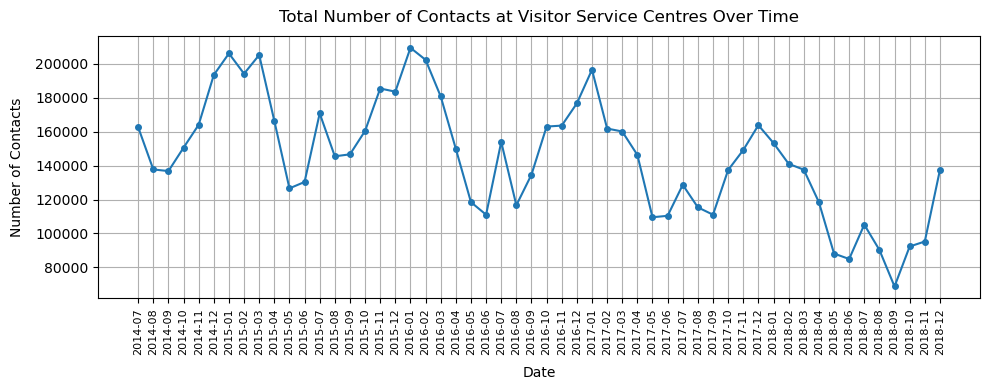

In [69]:
plt.figure(figsize = (10, 4))
plt.plot(sum_contacts['date'], sum_contacts['number_of_contacts'],
         marker = 'o', markersize = 4, linestyle = '-')
plt.title('Total Number of Contacts at Visitor Service Centres Over Time', pad = 10)
plt.xlabel('Date', labelpad = 8)
plt.ylabel('Number of Contacts', labelpad = 8)
plt.xticks(rotation = 90, size = 8)
plt.grid(True)
plt.tight_layout()
plt.show()

This line chart reveals notable trends in the number of contacts at Visitor Service Centres over time. It is particularly striking that contact volumes peak from December to March each year, while the period from May to September typically experiences the lowest number of visitor contacts. These observations could provide valuable insights for customer service centers, as they may correlate with fluctuations in the volume or nature of customer service requests. To explore this further, additional datasets will be analyzed to examine the relationship between periods of high visitor engagement and increased customer service requests. The integration of these data will allow for a more comprehensive analysis of trends and may reveal actionable correlations between visitor contact stats and customer service requests.

### Density of Cases Over Time and Categories

In [70]:
# use pivot_table to handle potential duplicate entries by aggregating them
heatmap_data = mth_sum_category.pivot_table(index = 'category',
                                            columns = 'month',
                                            values = 'total_cases',
                                            aggfunc = 'sum').fillna(0)

heatmap_data = heatmap_data.astype(int)   # convert the data to integers

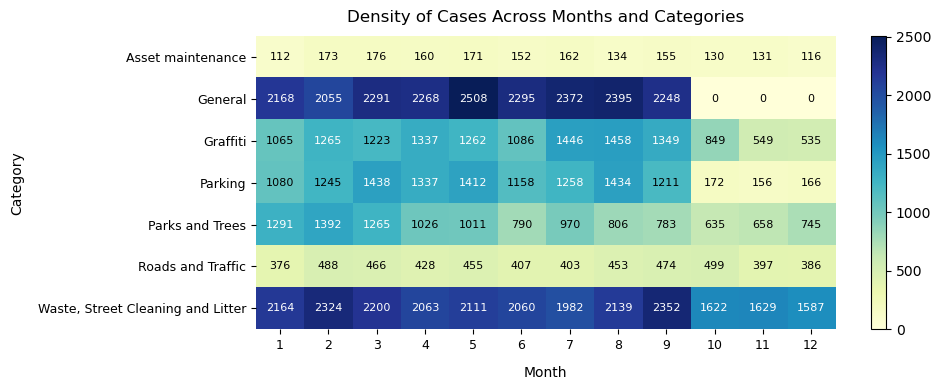

In [71]:
plt.figure(figsize = (10, 4))

# plt.imshow(heatmap_data, aspect = 'auto', cmap = 'YlGnBu')

# generate the heatmap
cax = plt.imshow(heatmap_data, aspect = 'auto', cmap = 'YlGnBu')

plt.colorbar(cax)  # add color bar

for (i, j), val in np.ndenumerate(heatmap_data):
    # text color based on tile color
    # Darker tile -> white text; lighter tile -> black text
    color = 'white' if heatmap_data.iloc[i, j] > heatmap_data.values.max() / 2 else 'black'
    plt.text(j, i, val, ha = 'center', va = 'center', color = color, fontsize = 8)


# set title and axis labels
plt.title('Density of Cases Across Months and Categories', size = 12, pad = 10)
plt.ylabel('Category', size = 10, labelpad = 10)
plt.xlabel('Month', size = 10, labelpad = 10)

# set tick labels
plt.xticks(np.arange(heatmap_data.shape[1]), heatmap_data.columns, rotation = 0, ha = 'center', size = 9)
plt.yticks(np.arange(heatmap_data.shape[0]), heatmap_data.index, size = 9)

# remove borders
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

plt.tight_layout()
plt.show()

The heatmap of case density across months and categories shows distinct patterns that may suggest seasonal trends and category-specific demand for services. For example, certain categories like 'Waste, Street Cleaning and Litter' show a consistent spread of cases throughout the year, while others like 'Geneal' may exhibit more variability. The heatmap can be leveraged to anticipate service demand, optimize resource allocation, and enhance service delivery efficiency based on the observed patterns. Further analysis might explore the reasons behind high and low case volumes and investigate any anomalies to ensure responsive and effective service management.

### Distribution of Service Types Across Categories

In [72]:
# aggregate the data for the treemap
treemap_data = df.groupby(['rec_year', 'category', 'service_type']).size().reset_index(name = 'total_cases')

# rename column
treemap_data.rename(columns = {'rec_year': 'year'}, inplace = True)

In [73]:
treemap_data_sum = treemap_data.groupby(['category', 'service_type'])['total_cases'].sum().reset_index()

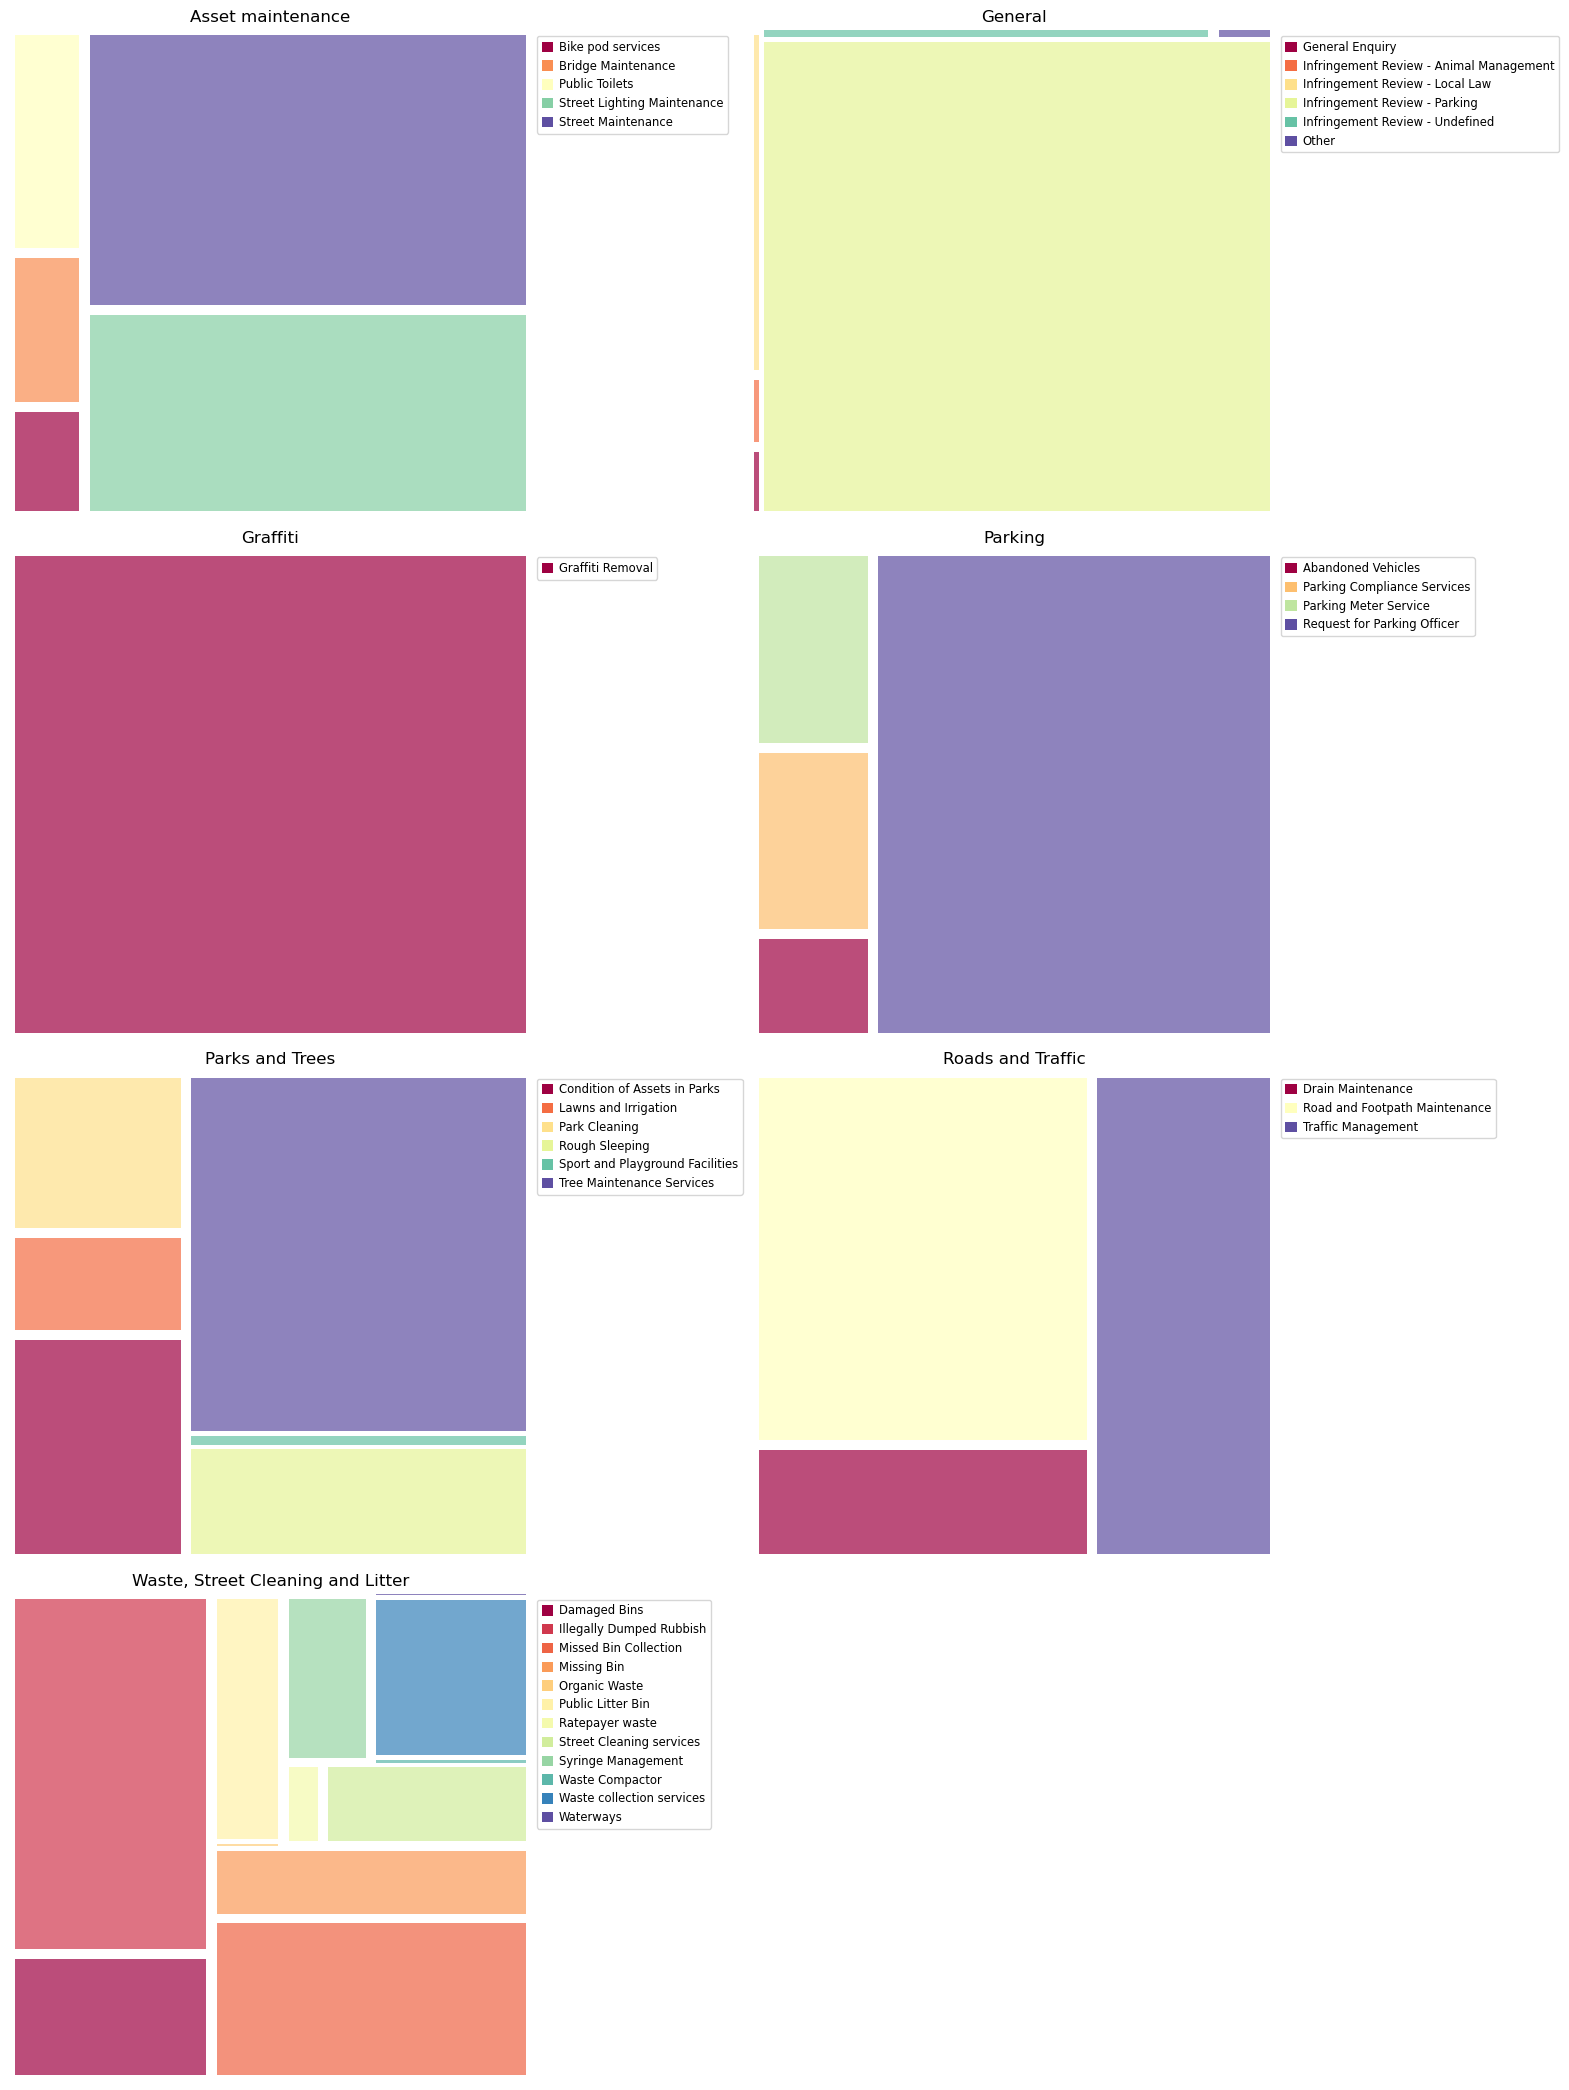

In [74]:
# prepare the data
unique_categories = treemap_data_sum['category'].unique()
# num_categories = len(unique_categories)

# create subplot grid
fig_tree, axes = plt.subplots(nrows = int(np.ceil(len(unique_categories) / 2)),
                              ncols = 2,
                              figsize = (16, len(unique_categories) * 3))

# flatten axes array for easier indexing
axes = axes.flatten()

# loop through each category and create treemap
for i, category in enumerate(unique_categories):

    # filter data for the category
    categories = treemap_data_sum[treemap_data_sum['category'] == category]
    sizes = categories['total_cases']
    labels = categories['service_type']
    # labels = categories.apply(lambda x: f"{x['service_type']}\n{x['total_cases']}", axis = 1)

    # color palette
    colors = plt.cm.Spectral(np.linspace(0, 1, len(labels)))
    color_dict = dict(zip(labels, colors))   # create dictionary to map labels to colors

    # create treemap
    # squarify.plot(sizes = sizes, label = labels, color = colors, alpha = 0.7, ax = axes[i], pad = True)
    squarify.plot(sizes = sizes, color = [color_dict[label] for label in labels], alpha = 0.7, ax = axes[i], pad = True)
    axes[i].set_title(category)
    axes[i].axis('off')  # hide the axes

    # legend
    patches = [plt.Rectangle((0, 0), 1, 1, facecolor = color_dict[label]) for label in labels]
    # axes[i].legend(patches, labels, loc = 'upper left', bbox_to_anchor = (1, 1))
    legend = axes[i].legend(patches, labels, loc = 'upper left', bbox_to_anchor = (1, 1),
                            fontsize = 'small',
                            handlelength = 1,      # shorter handles
                            handleheight = 1,      # shorter handles
                            handletextpad = 0.5)   # less space between handle and text


# hide any unused subplots
for ax in axes[len(unique_categories):]:
    ax.axis('off')

plt.tight_layout()
plt.subplots_adjust(right = 0.8)
plt.show()

The treemap provides a revealing snapshot of service demand distribution across various categories. Notably, requests for parking infringement reviews dominate the 'General' category, standing out as the most high-demand service across the board. This significant volume suggests a potential area for policy review or enhanced enforcement measures, as it may reflect widespread parking violations.

Graffiti removal emerges as the second most sought-after service, highlighting the need for resource allocation to manage this issue effectively. The prominence of these two service types may necessitate a reassessment of current policies and initiatives to address the underlying causes of these frequent requests.
On the other end of the spectrum, 'Asset maintenance' appears to attract the fewest requests, indicating a lower relative demand or, possibly, higher efficiency in addressing these issues. In contrast, the 'Waste, Street Cleaning, and Litter' category, along with 'General' services, show a higher incidence of requests. This pattern points to waste management and general municipal services as significant areas of public concern. Such insights are invaluable for city planners and service coordinators, offering a data-driven basis for budgeting and staffing decisions to improve services that residents frequently utilize.

### Count Service Requests Over Time by Category

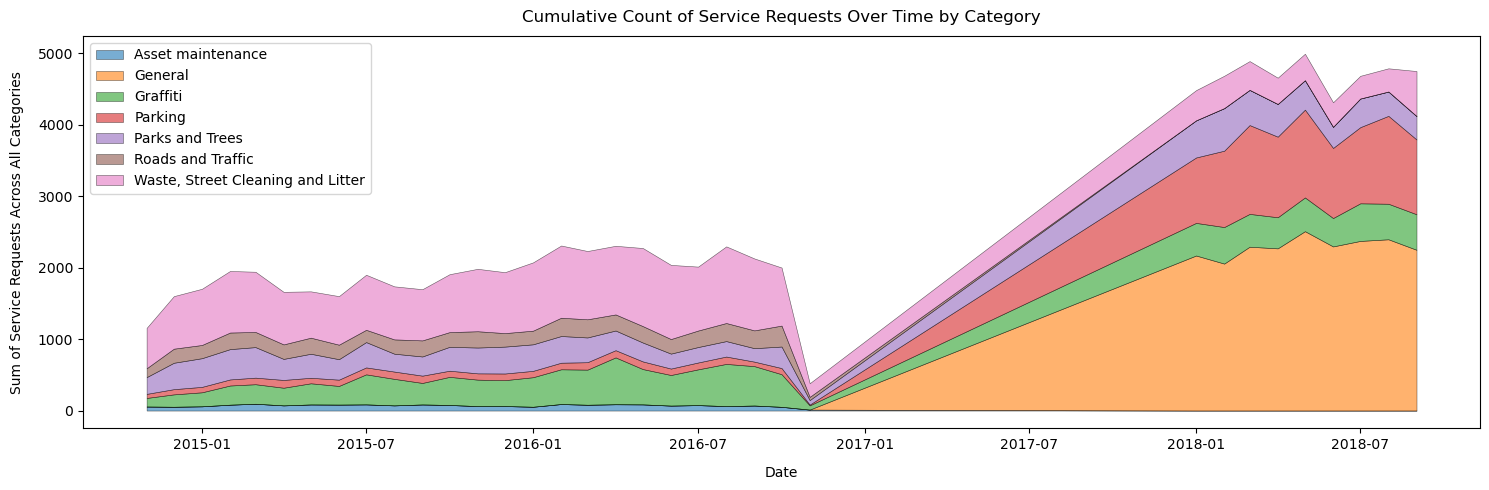

In [75]:
# create pivot table
pivot_data = mth_sum_category.pivot_table(index = 'date', columns = 'category', values = 'total_cases').fillna(0)

# convert the index to datetime to ensure the dates are in proper order
pivot_data.index = pd.to_datetime(pivot_data.index)

plt.figure(figsize = (15, 5))

# define baseline for stacking which starts at 0
baseline = np.zeros(len(pivot_data))

# iterate over each category to plot
for i, category in enumerate(pivot_data.columns):
    values = pivot_data[category].values
    plt.fill_between(pivot_data.index, baseline, baseline + values, label = category,
                     alpha = 0.6, edgecolor = 'black', linewidth = 0.4)

    # update baseline to stack the next category on top
    baseline += values

plt.title('Cumulative Count of Service Requests Over Time by Category', pad = 10)
plt.xlabel('Date', labelpad = 10)
plt.ylabel('Sum of Service Requests Across All Categories', labelpad = 10)
plt.legend(loc = 'upper left')
plt.xticks(rotation = 0)

plt.tight_layout()
plt.show()

The stacked area chart suggests a data recording gap between late 2016 and 2018, as indicated by the service request count dropping to zero. This likely points to an issue in data collection rather than a complete lack of service requests. Following this period, there is a marked resurgence in service requests, with the overall count surpassing 5000 cases from March 2018 onwards. The 'General' category sees an especially sharp increase, accounting for over 2000 requests per month by mid-2018, which may reflect an increased need for these services or a change in how cases are reported. The demand for graffiti removal services appears stable, suggesting a consistent need for this service throughout the time frame. In contrast, the asset maintenance category shows a downward trend, possibly indicating enhanced efficiency in infrastructure upkeep or a shift in service reporting protocols.

### Case Volume and Average Resolution Time by Case Origin for Waste Category

**Understand the 'case_origin' distribution**

Understanding how cases are distributed across different communication channels (phone, web, email, etc.) can help identify the most preferred methods for customers to interact with services.

In [76]:
# filter the data
waste_case_source = df[(df['case_origin'] != 'Unknown') & (df['category'] == 'Waste, Street Cleaning and Litter') & (df['days_to_complete'].notnull())].sort_values(by = ['date_received'])

print(waste_case_source.head(2))

       status date_received date_completed     suburb  \
46484  Closed    2018-01-01     2018-01-02  Southbank   
46498  Closed    2018-01-01     2018-01-15  Melbourne   

                                category              service_type  \
46484  Waste, Street Cleaning and Litter  Illegally Dumped Rubbish   
46498  Waste, Street Cleaning and Litter  Illegally Dumped Rubbish   

       days_to_complete case_origin  rec_year  rec_month  
46484                 1         Web      2018          1  
46498                14   Proactive      2018          1  


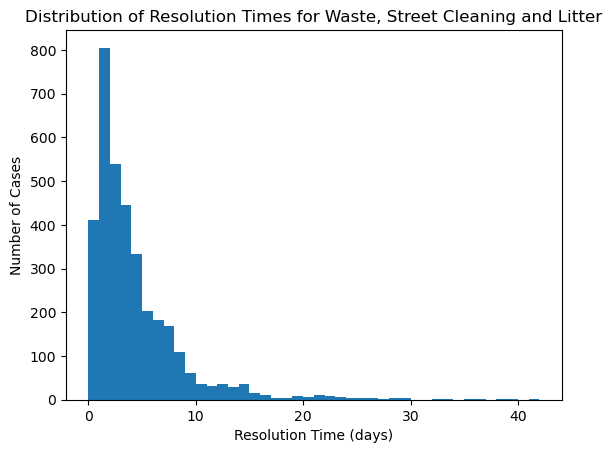

In [77]:
plt.hist(waste_case_source['days_to_complete'],
         bins = range(min(waste_case_source['days_to_complete']),
                      max(waste_case_source['days_to_complete']) + 1, 1))
plt.title('Distribution of Resolution Times for Waste, Street Cleaning and Litter')
plt.xlabel('Resolution Time (days)')
plt.ylabel('Number of Cases')
plt.show()

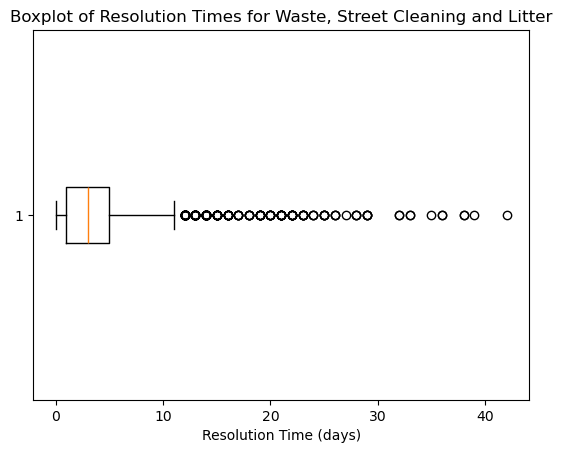

In [78]:
plt.boxplot(waste_case_source['days_to_complete'], vert = False)
plt.title('Boxplot of Resolution Times for Waste, Street Cleaning and Litter')
plt.xlabel('Resolution Time (days)')
plt.show()

In [79]:
# calculate basic descriptive statistics
desc_stats = waste_case_source['days_to_complete'].describe()

# calculate skewness and kurtosis
skewness = waste_case_source['days_to_complete'].skew()
kurtosis = waste_case_source['days_to_complete'].kurt()

print(desc_stats)
print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurtosis}")

count      3538.0
mean     3.866591
std       4.49971
min           0.0
25%           1.0
50%           3.0
75%           5.0
max          42.0
Name: days_to_complete, dtype: Float64
Skewness: 2.9401499151196453
Kurtosis: 12.79475755424526


The data suggest that the service for 'Waste, Street Cleaning and Litter' is quite efficient, with most cases being resolved in a short time frame. There are some cases that take much longer to resolve, which could be due to more complex issues or other factors that impede quick resolution.

Given the right skew and presence of outliers, the median is a more reliable measure of central tendency for this data. It indicates that a typical case is resolved in 3 days. The high kurtosis value implies that the process has occasional cases that are far from the norm. These may warrant further investigation to understand the reasons for such delays and to identify any potential improvements in service delivery.

**Resolution time by 'case_origin'**

Compare the resolution times ('days_to_complete') across different case origins to see if some channels experience faster or slower resolution times, which may indicate efficiency or accessibility issues.

In [80]:
# count the number of cases by case origin
waste_case_source_dist = waste_case_source['case_origin'].value_counts()

print(waste_case_source_dist)

case_origin
Phone              1518
Web                1096
Proactive           439
Snap Send Solve     425
Email                46
Face-to-Face          8
SMS                   3
Live Chat             3
Name: count, dtype: int64


In [81]:
# calculate the median resolution time by case origin
waste_res_time_by_origin = waste_case_source.groupby('case_origin')['days_to_complete'].median().reset_index()

# sort the DataFrame by 'days_to_complete' to order the bars in the bar chart
waste_res_time_by_origin = waste_res_time_by_origin.sort_values(by = 'days_to_complete')

print(waste_res_time_by_origin)

       case_origin  days_to_complete
2        Live Chat               0.0
4        Proactive               1.0
3            Phone               2.0
0            Email               2.5
6  Snap Send Solve               3.0
7              Web               3.0
5              SMS               4.0
1     Face-to-Face               4.5


In [82]:
# merge with the case origin count data
waste_res_time_by_origin = pd.merge(waste_res_time_by_origin, waste_case_source_dist, on = 'case_origin')

In [83]:
# define header and cells content for the table
header_values = ["Case Origin", "Median Resolution Time (days)", "Case Volume"]
cell_values = [waste_res_time_by_origin['case_origin'],
               waste_res_time_by_origin['days_to_complete'],
               waste_res_time_by_origin['count']]

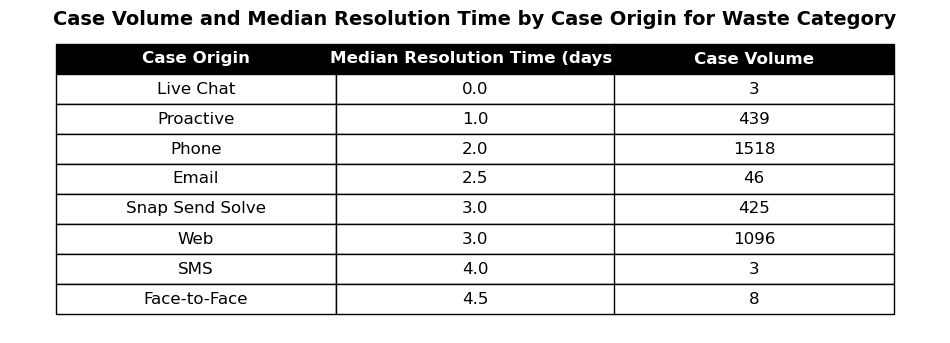

In [84]:
# figure size
plt.figure(figsize = (12, 4))
ax = plt.gca()
ax.axis('off')  # no axis for the table plot

# add title
plt.text(0.5, 1, 'Case Volume and Median Resolution Time by Case Origin for Waste Category',
         horizontalalignment = 'center',
         fontsize = 14,
         weight = 'bold',
         transform = ax.transAxes)

# create table
table = plt.table(
    cellText = waste_res_time_by_origin.values,    # data
    colLabels = header_values,                     # column headers
    loc = 'center',                                # table location
    cellLoc = 'center',                            # cell text alignment
    colWidths = [0.25, 0.25, 0.25]
)

# set font size
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.8)  # scale the table size

for col in range(len(waste_res_time_by_origin.columns)):
    cell = table[(0, col)]
    cell.set_text_props(weight = 'bold', color = 'white')
    cell.set_facecolor('black')

# adjust layout to make room for the title
# plt.subplots_adjust(top = 1)

plt.show()

The table reveals that digital and proactive channels generally offer quicker resolutions, which may encourage further investment in these areas to improve service efficiency. In contrast, traditional and in-person channels, while still important, appear to be slower and may require a review of operational processes. Understanding the reasons behind the varying median resolution times and case volumes can inform strategic decisions to enhance overall service delivery and customer satisfaction.

### Average Resolution Times by Category

In [85]:
# filter data
res_time_by_category = df[(df['days_to_complete'].notnull())].sort_values(by = ['date_received'])

print(res_time_by_category.head(2))

    status date_received date_completed   suburb  \
0   Closed    2014-11-10     2015-09-20  Unknown   
51  Closed    2014-11-10     2014-11-12  Unknown   

                             category           service_type  \
0                             Parking  Parking Meter Service   
51  Waste, Street Cleaning and Litter  Missed Bin Collection   

    days_to_complete case_origin  rec_year  rec_month  
0                314     Unknown      2014         11  
51                 2     Unknown      2014         11  


In [86]:
# calculate median resolution times for each category
median_res_time_by_category = res_time_by_category.groupby('category')['days_to_complete'].median().reset_index()

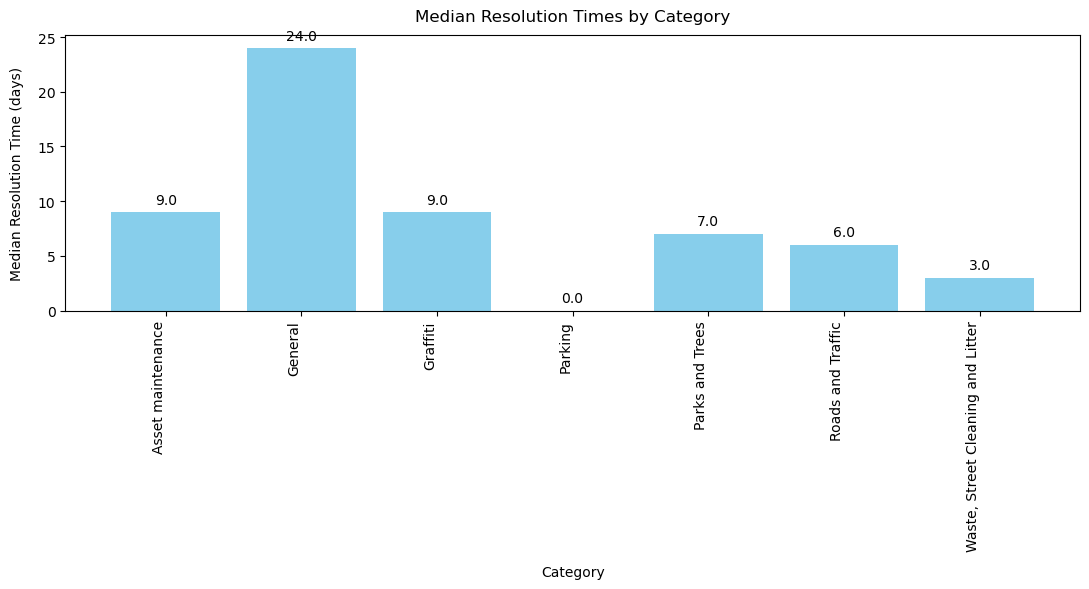

In [87]:
# bar chart
plt.figure(figsize = (11, 6))
bars = plt.bar(median_res_time_by_category['category'], median_res_time_by_category['days_to_complete'], color = 'skyblue')

# add data labels on the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, round(yval, 2), ha = 'center', va = 'bottom')

# set title and labels
plt.title('Median Resolution Times by Category', pad = 10)
plt.xlabel('Category', labelpad = 10)
plt.ylabel('Median Resolution Time (days)', labelpad = 10)

plt.xticks(rotation = 90, ha = 'right')

plt.tight_layout()
plt.show()

### Volume of Contacts by Channel and Category for 2018

In [88]:
# filter the DataFrame for records with known resolution times and case origins
# and aggregate the data for each category and channel
volume_by_channel_category = df[(df['case_origin'] != 'Unknown') & (df['days_to_complete'].notna())]
volume_by_channel_category = volume_by_channel_category.groupby(['category', 'case_origin']).size().reset_index(name = 'volume')

print(volume_by_channel_category.head(2))

  category   case_origin  volume
0  General         Email    1078
1  General  Face-to-Face       3


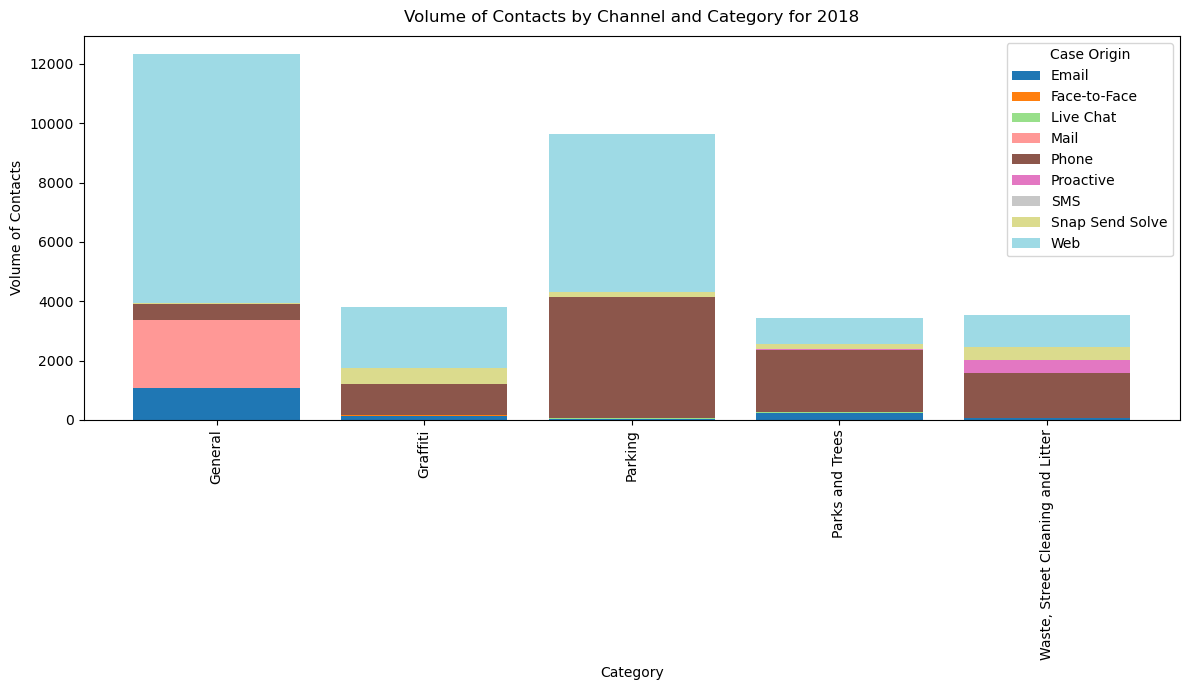

In [89]:
# pivot the dataframe to have 'case_origin' as columns and 'category' as rows
pivoted_stackedBar = volume_by_channel_category.pivot(index = 'category',
                                                      columns = 'case_origin',
                                                      values = 'volume').fillna(0)

# get the tab20 colormap
colormap = plt.get_cmap('tab20')
colors = [colormap(i) for i in np.linspace(0, 1, len(pivoted_stackedBar.columns))]

# create stacked bar chart
fig, ax = plt.subplots(figsize = (12, 7))

# plot the bars for each 'case_origin', stacked on top of each other
bottom_values = np.zeros(len(pivoted_stackedBar))

for i, case_origin in enumerate(pivoted_stackedBar.columns):
  ax.bar(pivoted_stackedBar.index, pivoted_stackedBar[case_origin],
         bottom = bottom_values, label = case_origin, color=colors[i])
  bottom_values += pivoted_stackedBar[case_origin].values

# set title and labels
ax.set_title('Volume of Contacts by Channel and Category for 2018', pad = 10)
ax.set_xlabel('Category')
ax.set_ylabel('Volume of Contacts')
ax.legend(title = 'Case Origin')
plt.xticks(rotation = 90)

plt.tight_layout()
plt.show()

The 'General' category displays the largest volume of contacts across almost all channels, which suggests it covers a diverse range of issues or inquiries. This trend may indicate the need for increased focus and resources to manage customer inquiries effectively.

The 'Web' and 'Phone' channels enjoy widespread popularity across all categories, reflecting a preference for digital and voice communication in addressing these matters.

'Face-to-Face', 'Live Chat', and 'SMS' are less frequently utilized channels across all categories, which could signal a tendency towards more traditional or straightforward forms of communication.

The 'Proactive' and 'Snap Send Solve' channels appear to be uniquely employed in certain categories, such as 'General' and 'Graffiti'. This specificity could point to targeted campaigns or initiatives designed to address issues pertinent to these categories.

The absence of categories such as 'Asset maintenance' and 'Roads and Traffic' from the data may necessitate an investigation to confirm there are no issues with data recording and to ensure that these channels are being properly monitored and reported. If this is a case of missing data, it underscores the importance of consistent data capture across all service categories to facilitate a comprehensive analysis.

### Average Resolution Time by Channel and Category

In [90]:
# group by category and case_origin and calculate the median resolution time
res_time_by_channel_category = df[(df['case_origin'] != 'Unknown') & (df['days_to_complete'].notna())]
res_time_by_channel_category = res_time_by_channel_category.groupby(['category', 'case_origin'])['days_to_complete'].median().reset_index()

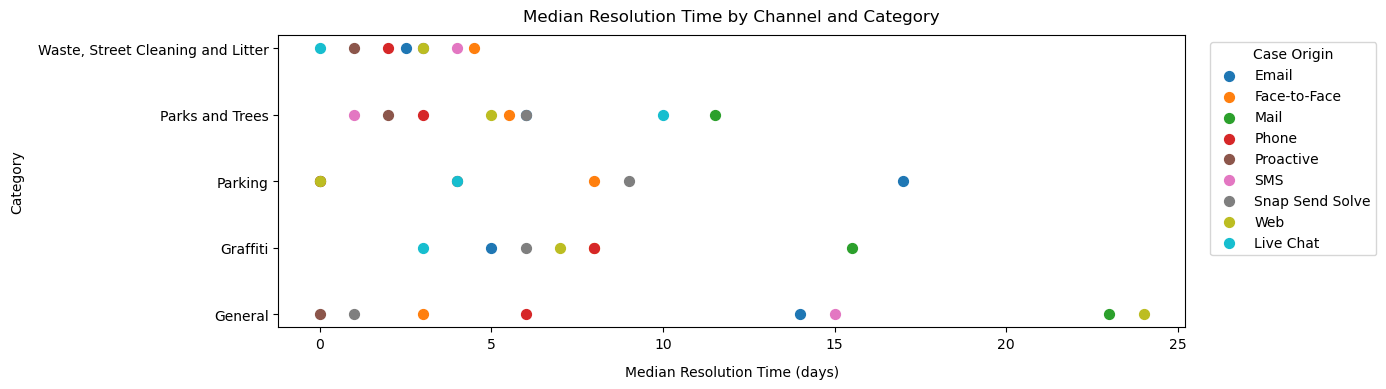

In [91]:
# get unique categories and case_origins
categories = res_time_by_channel_category['category'].unique()
case_origins = res_time_by_channel_category['case_origin'].unique()

# colormap
colors = plt.cm.tab10(np.linspace(0, 1, len(case_origins)))

# Start the plot
fig, ax = plt.subplots(figsize = (14, 4))

# create dot plot for each 'case_origin'
for i, origin in enumerate(case_origins):

    # filter the data
    data = res_time_by_channel_category[res_time_by_channel_category['case_origin'] == origin]
    ax.scatter(data['days_to_complete'], data['category'], color = colors[i], label = origin, s = 50)

# set the title and labels
ax.set_title('Median Resolution Time by Channel and Category', pad = 10)
ax.set_xlabel('Median Resolution Time (days)', labelpad = 10)
ax.set_ylabel('Category', labelpad = 10)
ax.legend(title = 'Case Origin', bbox_to_anchor = (1.02, 1), loc = 'upper left')

plt.tight_layout()
plt.show()


There is a noticeable variation in resolution times across different communication channels within the same category. The absence of resolution days for certain channels may imply no activity, pointing to the possibility that the choice of communication method can significantly influence the promptness of issue resolution.

The 'Web' and 'Mail' channels exhibit high median resolution times within the 'General' category, which may suggest a backlog in case handling or inherently slower processes associated with these request types.

In the 'Waste' category, resolution times are notably uniform across channels, indicating a potentially standardized approach to responding to these issues.

Conversely, the 'Phone' and 'Snap Send Solve' channels demonstrate relatively lower median resolution times across most categories, alluding to greater efficiency in these communication forms. Specifically, the 'SMS' channel shows expedited resolution in the 'Parking' category, which suggests that text messaging may facilitate faster problem-solving. On the other hand, the 'Mail' channel's extended resolution times across various categories could stem from the natural delays in postal delivery or the time needed to process mailed requests.

Overall, the data indicates that digital and instantaneous communication methods, such as 'Phone', 'Live Chat', and 'Snap Send Solve', are associated with quicker resolution times, whereas traditional methods like 'Mail' and 'Web' tend to require longer periods.

It's noteworthy that the 'Parking' category primarily utilizes web and phone channels for service requests, which is correlated with a highly efficient resolution time—median days to completion is at zero for these channels.

However, the 'General' category tells a different story; it receives the bulk of its requests via web and mail, followed by email. Interestingly, these channels are associated with the longest durations for case resolution.

An intriguing observation from the stacked bar chart is the scant usage of mail for reporting graffiti, which may be attributable to it having the longest resolution time among all communication channels.

Another compelling insight is the even distribution of service requests within the 'Waste' category across various channels, paralleled by uniform resolution times. This consistency suggests an efficient, standardized process for handling waste-related services, regardless of the communication method.